### Contents

* [1. Problem formulation](#1)
* [2. Collecting the data](#2)
* [3. Exploratory Data Analysis (EDA)](#3)
* [4. Data Preprocessing](#4)
* [5. Choosing and Training a model](#5)
* [6. Evaluating a model](#6)

---
<a name='1'><a>
# **1. Problem Formulation**

Dogecoin is a cryptocurrency, similar to Bitcoin or Ethereum, but it is unique in its origin and community. It was originally created as a joke based on an internet meme, but over time it became a widely traded digital asset with high market activity and price volatility.

In this project, I am using historical Dogecoin price data to build a machine learning model that can predict its future closing price. The goal is to understand patterns in past price movements and use them to forecast what may happen in the upcoming days.

Since the value I want to predict (the future closing price) is a continuous number, this becomes a **regression-based time series forecasting problem**.

---

### ✔ Using the Dataset

I am using features such as:

* Date (time index)
* Opening price
* Highest and lowest price of the day
* Closing price
* Trading volume

These values will help the model learn how Dogecoin price behaves over time.

---

### ✔ Learning Objective

I am training the model to learn a function:

$$
\text{Predicted Price} = f(\text{Past Data})
$$

During training, the model minimizes the error between predicted prices and actual prices using evaluation metrics:

* **MAE** – Mean Absolute Error
* **MSE** – Mean Squared Error
* **RMSE** – Root Mean Squared Error

---


### ✔ Purpose and Importance

By building this predictive model, I am trying to analyze Dogecoin price trends and estimate possible future values. Such predictions may help traders, researchers, or anyone interested in understanding crypto price behavior and volatility.

---

<a name='2'><a>
# **2. Collecting the Data**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('/content/DOGE-USD.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,0.001207,0.001415,0.001181,0.001415,0.001415,6259550.0
1,2017-11-10,0.001421,0.001431,0.001125,0.001163,0.001163,4246520.0
2,2017-11-11,0.001146,0.001257,0.001141,0.001201,0.001201,2231080.0
3,2017-11-12,0.001189,0.001210,0.001002,0.001038,0.001038,3288960.0
4,2017-11-13,0.001046,0.001212,0.001019,0.001211,0.001211,2481270.0
...,...,...,...,...,...,...,...
1756,2022-08-31,0.061534,0.063333,0.061058,0.061330,0.061330,309748693.0
1757,2022-09-01,0.061336,0.062479,0.060194,0.062372,0.062372,328765413.0
1758,2022-09-02,0.062372,0.062712,0.060947,0.061635,0.061635,273453013.0
1759,2022-09-03,NaN,NaN,NaN,NaN,NaN,NaN


### 🧩 Feature Information
---

| Feature Name  | Type       | Description                                                                         | Role                                                     |
| ------------- | ---------- | ----------------------------------------------------------------------------------- | -------------------------------------------------------- |
| **Date**      | Time/Index | The calendar date of the recorded price data. Maintains time order for forecasting. | Reference / Index (not used directly as numeric feature) |
| **Open**      | Numeric    | Price of Dogecoin at the start of the trading day.                                  | Input Feature                                            |
| **High**      | Numeric    | Highest price reached during the day.                                               | Input Feature                                            |
| **Low**       | Numeric    | Lowest price during the day.                                                        | Input Feature                                            |
| **Close**     | Numeric    | Final trading price at the end of the day.                                          | **Target Variable (Prediction Output)**                  |
| **Adj Close** | Numeric    | Adjusted closing price accounting for splits, dividends, or corrections.            | Input Feature / Optional for more accurate modeling      |
| **Volume**    | Numeric    | Total number of Dogecoin traded during the day. Indicates market activity.          | Input Feature                                            |

---


In [3]:
df.shape

(1761, 7)

<a name='3'><a>
# **3. Exploratory Data Analysis**

In [4]:
# Checking the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1761 non-null   object 
 1   Open       1760 non-null   float64
 2   High       1760 non-null   float64
 3   Low        1760 non-null   float64
 4   Close      1760 non-null   float64
 5   Adj Close  1760 non-null   float64
 6   Volume     1760 non-null   float64
dtypes: float64(6), object(1)
memory usage: 96.4+ KB


In [5]:
# Getting statistical summary of numeric columns
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1760.000000,1760.000000,1760.000000,1760.000000,1760.000000,1.760000e+03
mean,0.059575,0.063096,0.056126,0.059619,0.059619,1.016258e+09
std,0.101325,0.109152,0.093695,0.101379,0.101379,3.563999e+09
min,0.001046,0.001210,0.001002,0.001038,0.001038,1.431720e+06
25%,0.002550,0.002616,0.002500,0.002548,0.002548,2.307671e+07
50%,0.003476,0.003603,0.003356,0.003495,0.003495,8.981855e+07
75%,0.070633,0.075035,0.068478,0.070657,0.070657,6.565853e+08
max,0.687801,0.737567,0.608168,0.684777,0.684777,6.941068e+10


In [6]:
# Checking for missing values in each columns
df.isnull().sum()

,0
Date,0
Open,1
High,1
Low,1
Close,1
Adj Close,1
Volume,1


In [7]:
# Dropping the missing values
df = df.dropna()

In [8]:
# Checking for duplicate rows in the dataset
df.duplicated().sum()

np.int64(0)

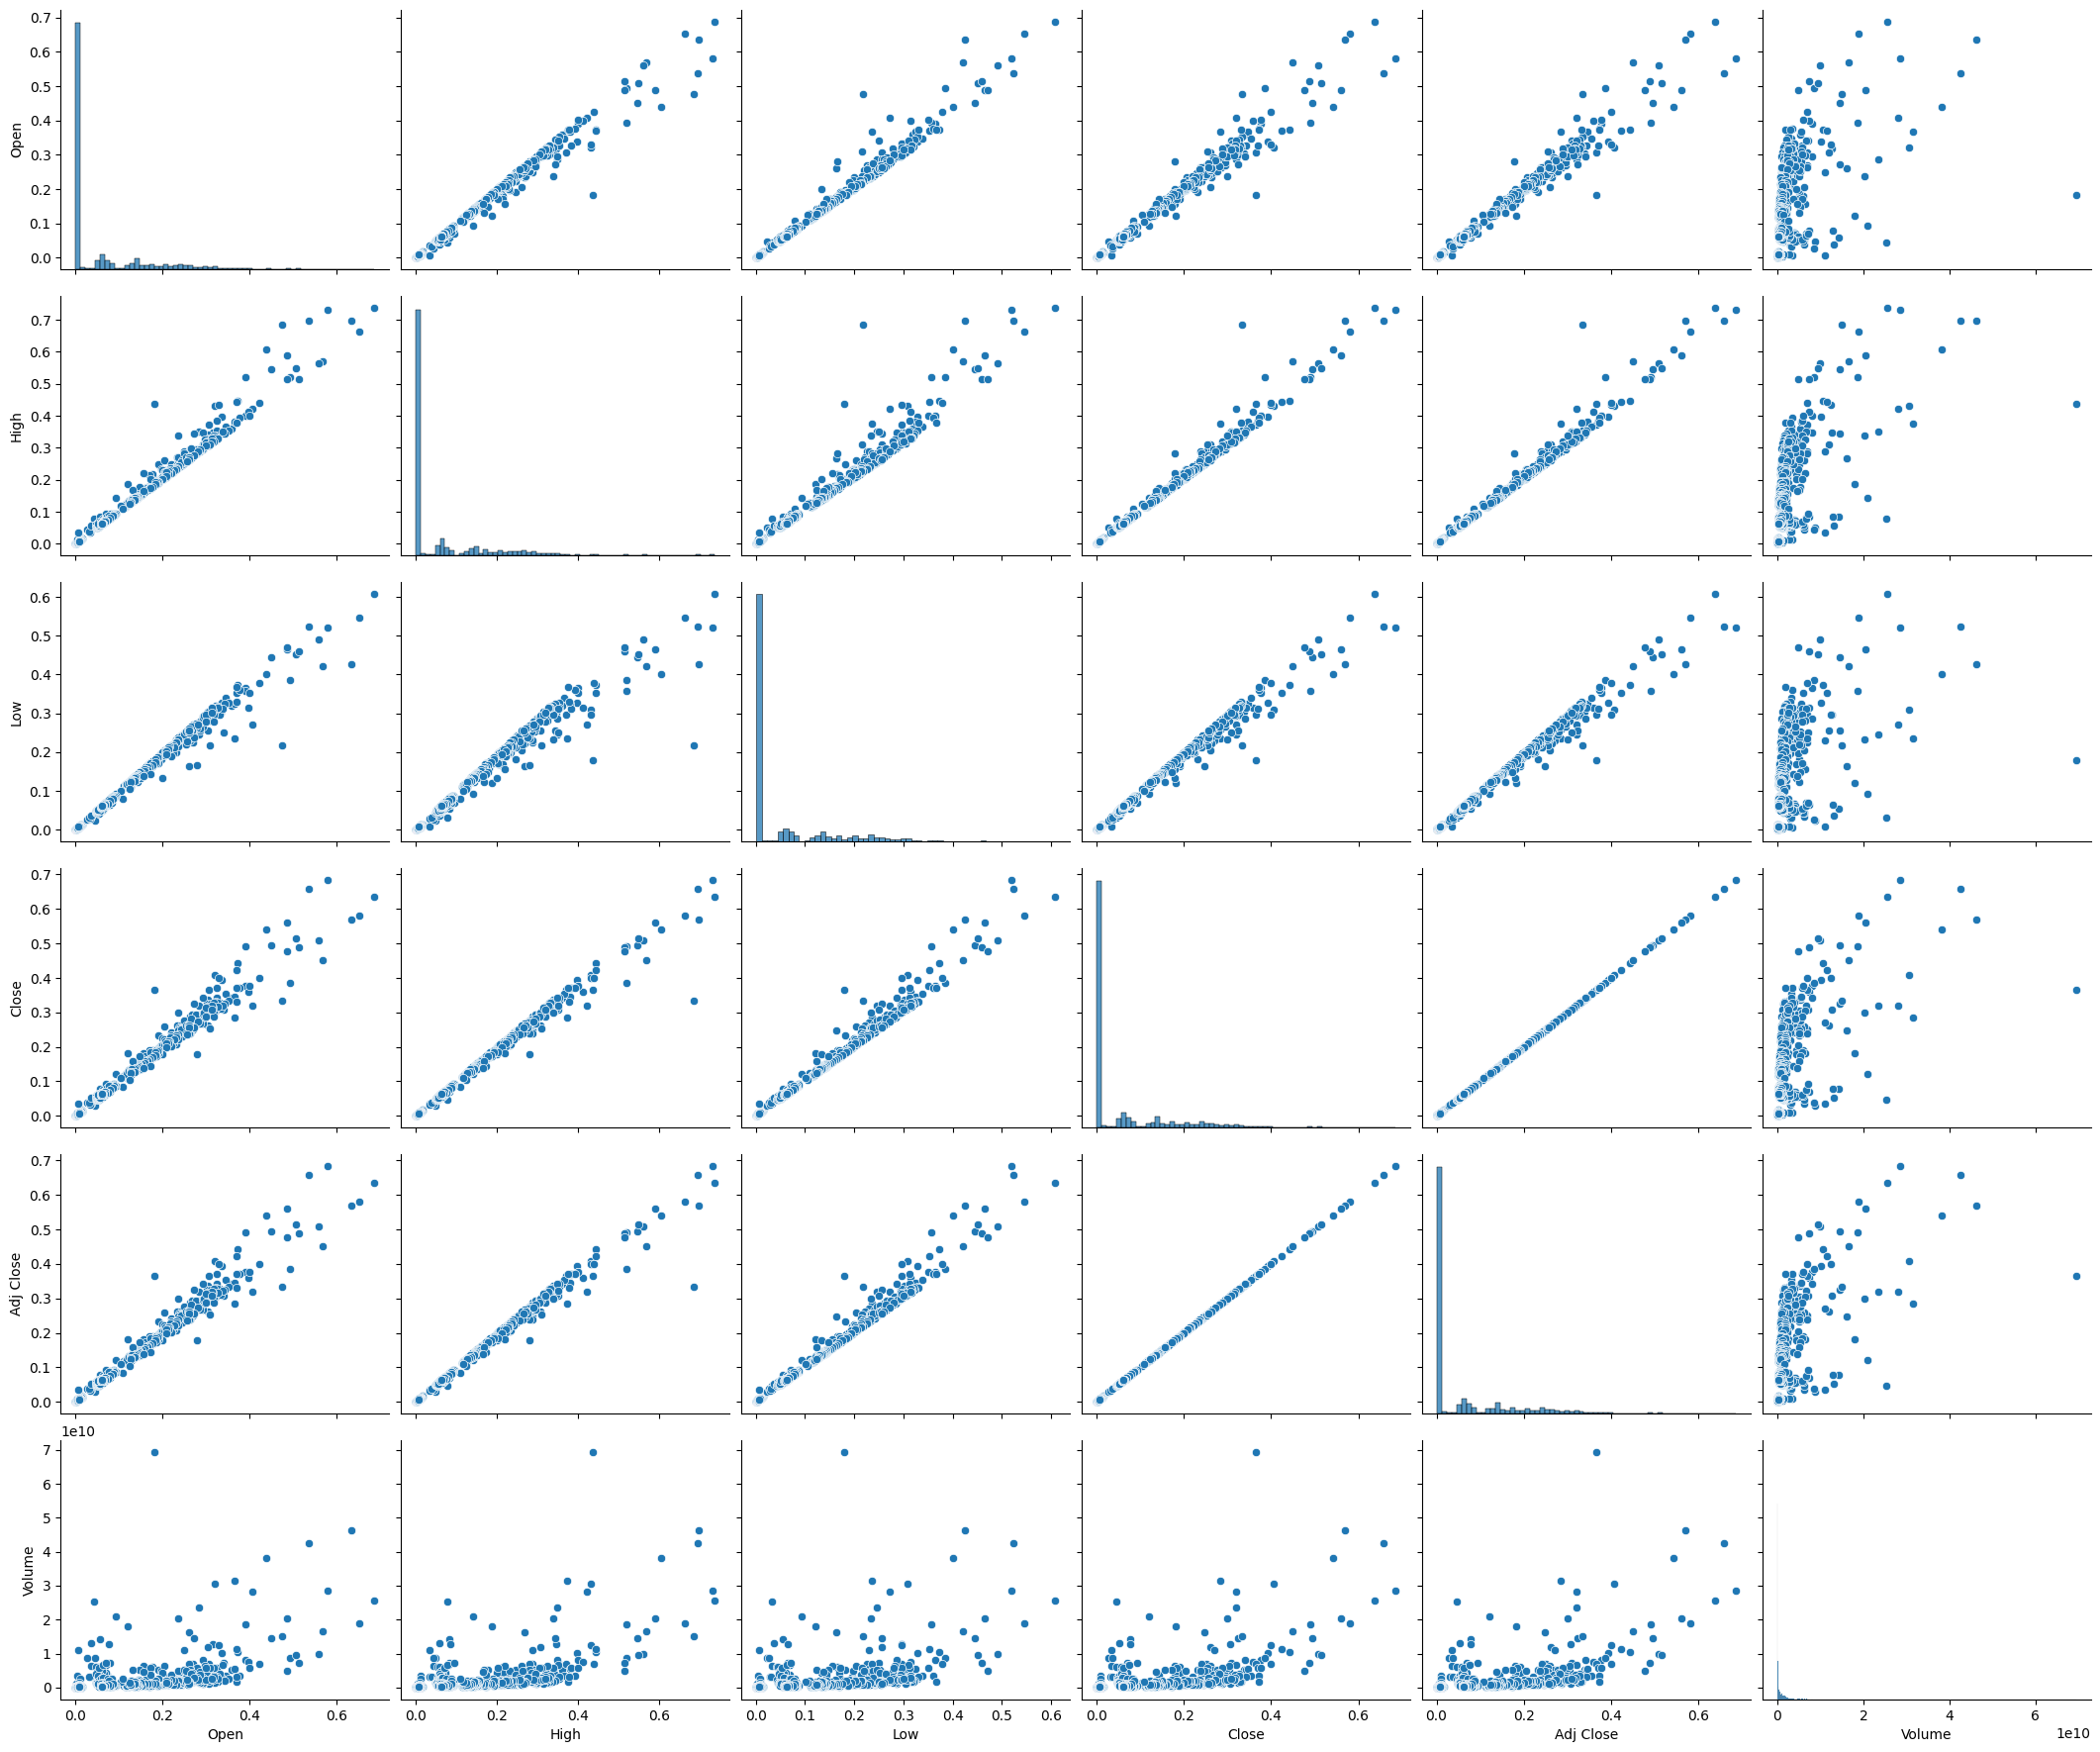

In [9]:
# Visualizing pairwise relationships between numerical features
sns.pairplot(df, height=3, aspect=1.2)

Text(0.5, 1.0, 'Correlation Matrix')

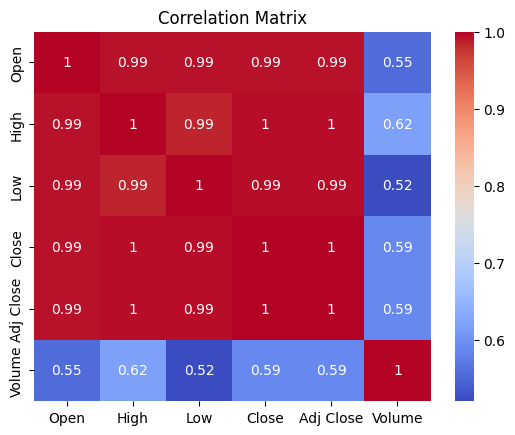

In [10]:
# Plotting the correlation heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

In [11]:
# Converting the Date column to datetime format
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)

# Setting the Date column as the index for time-series operations
df.set_index('Date', inplace=True)

/tmp/ipython-input-1888019266.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
/tmp/ipython-input-1888019266.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)


Text(0.5, 1.0, 'Date vs Close Price')

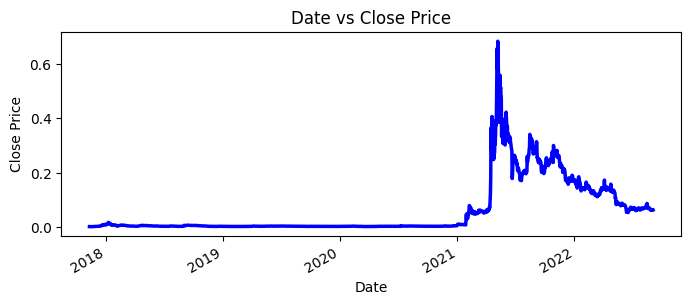

In [12]:
# Analysing closing prices

plt.figure(figsize=(8,3))
x = df.groupby('Date')['Close'].mean()
x.plot(linewidth=2.5, color='b')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title("Date vs Close Price")

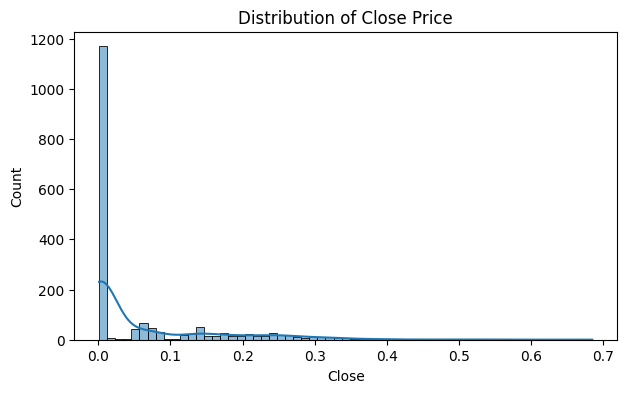

In [13]:
# Distribution of Close price
plt.figure(figsize=(7,4))
sns.histplot(df['Close'], kde=True)
plt.title("Distribution of Close Price")
plt.show()

<a name='4'><a>
# **4. Data Preprocessing**

* Making data ready for the ML model.
* Applying the same steps to train and test sets.

    Key steps:
    * Filling missing values
    * Converting categorical features to numbers
    * Scaling numeric features

* Using functions wherever possible to apply the same steps consistently.

Here I just need to do - 'Scaling'

In [14]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df[['Open', 'High', 'Low', 'Volume']]   # independent variables
y = df['Close']                              # dependent variable (target)

# Train-test split (time-series, so no shuffle)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [15]:
X_train.head(3)

,Open,High,Low,Volume
Date,,,,
2017-11-09,0.001207,0.001415,0.001181,6259550.0
2017-11-10,0.001421,0.001431,0.001125,4246520.0
2017-11-11,0.001146,0.001257,0.001141,2231080.0


In [16]:
y_train.head()

,Close
Date,
2017-11-09,0.001415
2017-11-10,0.001163
2017-11-11,0.001201
2017-11-12,0.001038
2017-11-13,0.001211


In [17]:
from sklearn.preprocessing import MinMaxScaler

# Initialize scaler
scaler = MinMaxScaler()

# Fitting and transforming train data, only transforming test data (to avoid data leakage)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

<a name='5'><a>
# **5. Choosing and Training a Model**

In [18]:
from sklearn.ensemble import RandomForestRegressor

# Initializing model
rf_model = RandomForestRegressor(
    n_estimators=200,   # Number of trees
    max_depth=10,       # Maximum depth of each tree
    random_state=42
)

# Training the model
rf_model.fit(X_train_scaled, y_train)


RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42)

In [19]:
# Predicting on train and test sets
y_train_pred = rf_model.predict(X_train_scaled)
y_test_pred = rf_model.predict(X_test_scaled)

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Metrics
print("Train RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("Test RMSE: ", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("Test R2:   ", r2_score(y_test, y_test_pred))
print(f"Model Accuracy: {r2_score(y_test, y_test_pred)*100:.2f}%")

Train RMSE: 0.0031693056398291843
Test RMSE:  0.01249480898509719
Test R2:    0.9613573318353249
Model Accuracy: 96.14%


## Visualizations: Actual vs Predicted

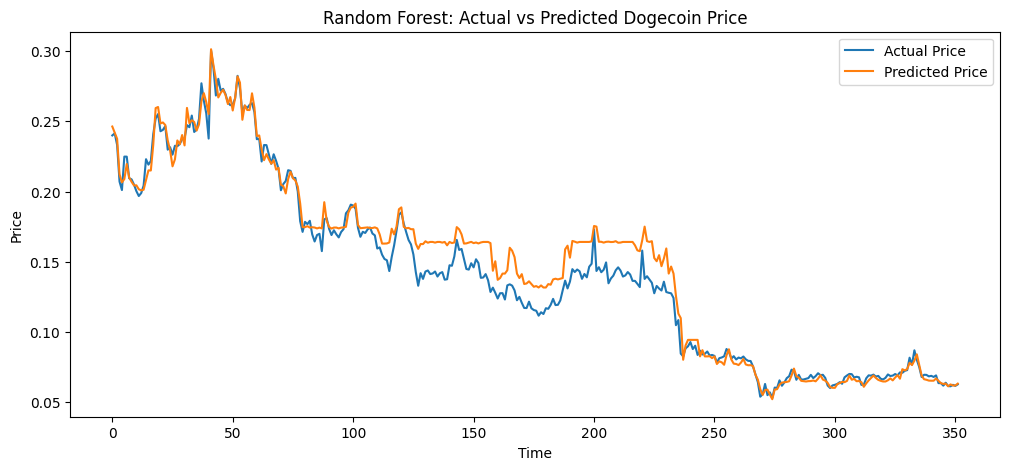

In [21]:
plt.figure(figsize=(12,5))
plt.plot(y_test.values, label="Actual Price")
plt.plot(y_test_pred, label="Predicted Price")
plt.title("Random Forest: Actual vs Predicted Dogecoin Price")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.show()